In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# Step 2: Load Dataset
df = pd.read_csv("Skin_Cancer_Data.csv")
print("First 5 rows:")
print(df.head())

First 5 rows:
   ID  Texture  Symmetry  Border_Irregularity  Color_Variation  Age      Label
0   1     0.65      0.72                 0.15             0.23   45     Benign
1   2     0.80      0.55                 0.45             0.58   60  Malignant
2   3     0.74      0.68                 0.35             0.42   38     Benign
3   4     0.90      0.40                 0.60             0.70   55  Malignant
4   5     0.66      0.77                 0.18             0.27   47     Benign


In [4]:
# Step 3: Data Preprocessing
df = df.drop("ID", axis=1)  # Remove ID column

# Encode target label (Benign=0, Malignant=1)
df["Label"] = LabelEncoder().fit_transform(df["Label"])

# Features and target
X = df.drop("Label", axis=1)
y = df["Label"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [6]:
# Step 5: Train SVM model
svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [7]:
# Step 6: Evaluate model
y_pred = svm.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Accuracy: 1.0


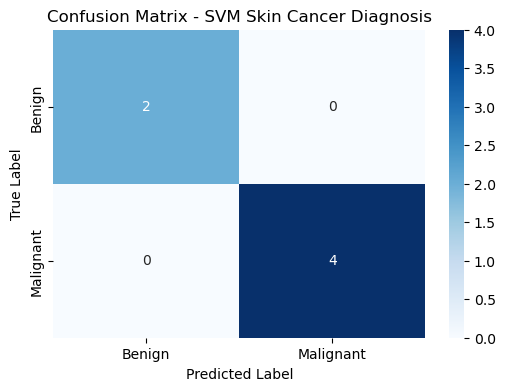

In [8]:

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Skin Cancer Diagnosis")
plt.show()


In [9]:
# Step 8: Decision Boundary (optional 2D visualization)
# Using only first two features for simplicity
X_vis = X_scaled[:, :2]
svm_vis = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_vis.fit(X_vis, y)

SVC()

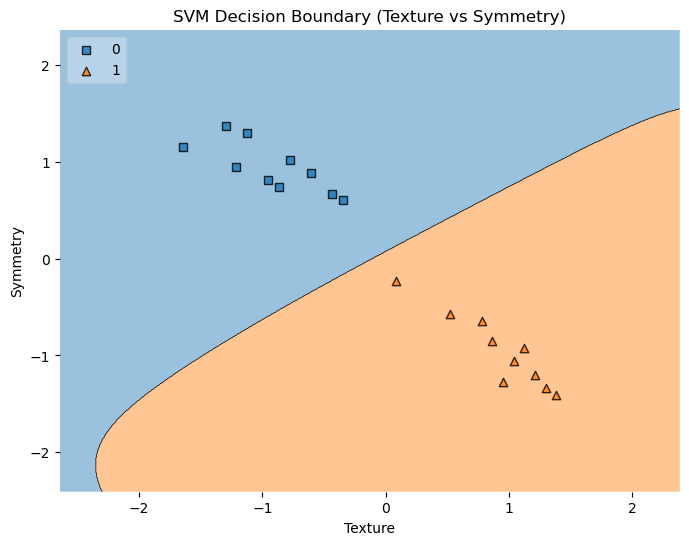

In [10]:
# Plot decision regions
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(8,6))
plot_decision_regions(X_vis, y.values, clf=svm_vis, legend=2)
plt.xlabel("Texture")
plt.ylabel("Symmetry")
plt.title("SVM Decision Boundary (Texture vs Symmetry)")
plt.show()